In [17]:
del model

In [18]:
keras.backend.clear_session()

In [19]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
import tensorflow as tf
from tensorflow import keras


In [21]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [22]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [23]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [24]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_valid = sc.fit_transform(x_valid)

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
x_train.shape

(11610, 8)

In [28]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs =[input_], outputs = [output] )

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [30]:
model.compile(loss = 'mean_squared_error',
              optimizer = keras.optimizers.SGD(lr = 1e-3),
              metrics = ['mae']             
             )

In [31]:
model_history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 3s 6ms/step - loss: 0.6835 - mae: 0.5791 - val_loss: 0.4839 - val_mae: 0.5028
Epoch 2/40
363/363 [==============================] - 2s 6ms/step - loss: 0.4452 - mae: 0.4786 - val_loss: 0.4820 - val_mae: 0.4918
Epoch 3/40
363/363 [==============================] - 4s 11ms/step - loss: 0.5714 - mae: 0.4891 - val_loss: 0.4583 - val_mae: 0.4944
Epoch 4/40
363/363 [==============================] - 3s 9ms/step - loss: 0.3907 - mae: 0.4456 - val_loss: 0.4320 - val_mae: 0.4754
Epoch 5/40
363/363 [==============================] - 4s 11ms/step - loss: 0.3887 - mae: 0.4395 - val_loss: 0.6027 - val_mae: 0.4889
Epoch 6/40
363/363 [==============================] - 4s 12ms/step - loss: 0.6601 - mae: 0.4937 - val_loss: 0.7454 - val_mae: 0.5244
Epoch 7/40
363/363 [==============================] - 3s 9ms/step - loss: 0.6997 - mae: 0.4996 - val_loss: 0.4574 - val_mae: 0.4637
Epoch 8/40
363/363 [==============================] - 3s 7ms/step - loss:

In [32]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 2s 9ms/step - loss: nan - mae: nan


In [33]:
model_history.history

{'loss': [0.6835399866104126,
  0.4452293813228607,
  0.5714208483695984,
  0.39072614908218384,
  0.3886835277080536,
  0.6600863337516785,
  0.6996917128562927,
  0.3670467436313629,
  0.5793748497962952,
  1.8893582820892334,
  30.391071319580078,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'mae': [0.5790759325027466,
  0.47855308651924133,
  0.48913612961769104,
  0.44560807943344116,
  0.43954986333847046,
  0.4937128722667694,
  0.49957647919654846,
  0.4312383830547333,
  0.5019379258155823,
  0.5398670434951782,
  0.6573231816291809,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_loss': [0.4839116334915161,
  0.4819798171520233,
  0.45827433466911316,
  0.4320

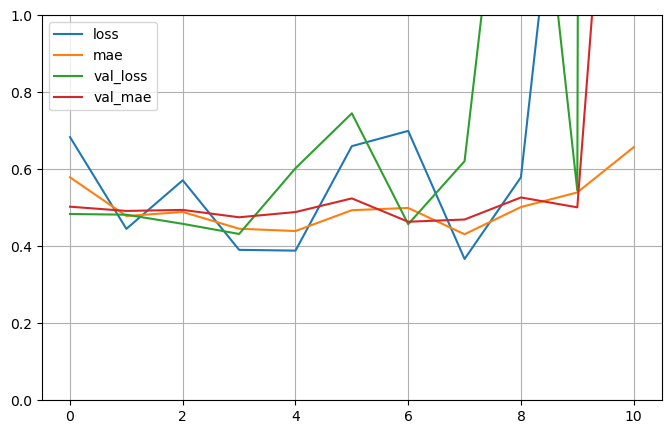

In [34]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()